# Plot the latent dynamics (goverened by the ODE)

Load data from the data/rot_mnist/rot_mnist.mat

In [1]:
import scipy.io as sio
import numpy as np
import torch
from torch.utils import data
import os
import matplotlib.pyplot as plt
from data.utils import Dataset

/Users/ilze/PhD/virtualenv/env3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ts  = 0.1 * torch.arange(16,dtype=torch.float)

In [3]:
ts

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000])

In [2]:
fullname = os.path.join('data', "rot_mnist", "rot-mnist.mat")
dataset = sio.loadmat(fullname)

X = np.squeeze(dataset['X'])
if True:
    Y = np.squeeze(dataset['Y'])
    X = X[Y==3,:,:]

N = 360
Nvalid = 40 + N
Ntest = 40 + Nvalid
T = 16
Xtr   = torch.tensor(X[:N],dtype=torch.float32).view([N,T,1,28,28])
Xvalid = torch.tensor(X[N:Nvalid],dtype=torch.float32).view([-1,T,1,28,28])
Xtest = torch.tensor(X[Nvalid:Ntest],dtype=torch.float32).view([-1,T,1,28,28])

# Generators
params = {'batch_size': 20, 'shuffle': True, 'num_workers': 2} #25
trainset = Dataset(Xtr)
trainset = data.DataLoader(trainset, **params)
validset  = Dataset(Xvalid)
validset  = data.DataLoader(validset, **params)
testset  = Dataset(Xtest)
testset  = data.DataLoader(testset, **params)



Load models

In [3]:
from telnetlib import GA
import torch
from torch.distributions import MultivariateNormal 
from model.core.flow import Flow
from model.core.svpy import SVGP_Layer
from model.core.flow import Flow
from model.core.vae import VAE  
from model.core.odegpvae import ODEGPVAE

In [4]:
device = 'cpu'

In [5]:
# odegpvae_ode1_kl_reg = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=8*2, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False, order=1),
#                         vae= VAE(frames = 5, n_filt=8, latent_dim=16, order= 1, device=device, distribution='bernoulli'),
#                         num_observations= N,
#                         order = 1,
#                         ts_dense_scale=2,
#                         steps=5)

# odegpvae_ode2_kl_reg = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=16, D_out=8, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False, order=2),
#                         vae= VAE(frames = 5, n_filt=8, latent_dim=8, order= 2, device=device, distribution='bernoulli'),
#                         num_observations= N,
#                         order = 2,
#                         ts_dense_scale=2,
                        # steps=5)

# odegpvae_ode1_df = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=16, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
#                         vae= VAE(frames = 5, n_filt=8, latent_dim=16, order= 1, device=device, distribution='bernoulli'),
#                         num_observations= N,
#                         order = 1,
#                         ts_dense_scale=2,
#                         steps=5)

odegpvae_ode1_rbf_6_rand = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='RBF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

odegpvae_ode1_rbf_6_fixed = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='RBF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)


odegpvae_ode1_rbf_16_fixed = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=16, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='RBF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=16, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

odegpvae_ode1_df_6_rand = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

odegpvae_ode1_df_6_fixed = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

odegpvae_ode1_df_16_fixed = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=16, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=16, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)


In [27]:
# odegpvae_ode1_kl_reg.to(device)
# fname = 'results/mnist_04_10_2022-09:56/odegpvae_mnist.pth'
# odegpvae_ode1_kl_reg.load_state_dict(torch.load(fname,map_location=torch.device(device)))
# odegpvae_ode1_kl_reg.eval()

# odegpvae_ode2_kl_reg.to(device)
# fname = 'results/mnist_04_10_2022-09:02/odegpvae_mnist.pth'
# odegpvae_ode2_kl_reg.load_state_dict(torch.load(fname,map_location=torch.device(device)))
# odegpvae_ode2_kl_reg.eval()

# odegpvae_ode1_df.to(device)
# fname = 'results/mnist_26_10_2022-11:58/odegpvae_mnist.pth'
# odegpvae_ode1_df.load_state_dict(torch.load(fname,map_location=torch.device(device)))
# odegpvae_ode1_df.eval()

### BEST MODELS (for initilization can check)
#all 1st order
#RBF
odegpvae_ode1_rbf_6_rand.to(device) #still training the final-final model, see latent mnist_28_10_2022-11:21
fname = 'results/new27/mnist_27_10_2022-15:32/odegpvae_mnist.pth'
fname = 'results/mnist_31_10_2022-13:32/odegpvae_mnist.pth'
fname = 'results/new01/mnist_01_11_2022-11:58/odegpvae_mnist.pth'
odegpvae_ode1_rbf_6_rand.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1_rbf_6_rand.eval()

# ### still training mnist_28_10_2022-15:27 TODO ADJUST PATH but only trained for 300 epochs
# odegpvae_ode1_rbf_6_fixed.to(device)
# fname = 'results/new/mnist_28_10_2022-15:27/odegpvae_mnist.pth'
# fname = 'results/mnist_31_10_2022-13:30/odegpvae_mnist.pth'
# odegpvae_ode1_rbf_6_fixed.load_state_dict(torch.load(fname,map_location=torch.device(device)))
# odegpvae_ode1_rbf_6_fixed.eval()

# odegpvae_ode1_rbf_16_fixed.to(device)
# fname = 'results/new/mnist_25_10_2022-14:47/odegpvae_mnist.pth'
# odegpvae_ode1_rbf_16_fixed.load_state_dict(torch.load(fname,map_location=torch.device(device)))
# odegpvae_ode1_rbf_16_fixed.eval()

#DF possibluy change to the models trained for 5000 epochs 
odegpvae_ode1_df_6_rand.to(device) #still training the final - final model see latest mnist_28_10_2022-14:11 
fname = 'results/new27/mnist_27_10_2022-14:28/odegpvae_mnist.pth'
fname = 'results/new31/mnist_31_10_2022-13:28/odegpvae_mnist.pth'
# fname = 'results/mnist_28_10_2022-14:20/odegpvae_mnist.pth'
# fname = 'results/new01/mnist_01_11_2022-11:59/odegpvae_mnist.pth'
odegpvae_ode1_df_6_rand.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1_df_6_rand.eval()

# odegpvae_ode1_df_6_fixed.to(device)
# fname = 'results/new27/mnist_27_10_2022-09:50/odegpvae_mnist.pth'
# fname = 'results/mnist_31_10_2022-13:32/odegpvae_mnist.pth'
# odegpvae_ode1_df_6_fixed.load_state_dict(torch.load(fname,map_location=torch.device(device)))
# odegpvae_ode1_df_6_fixed.eval()


# odegpvae_ode1_df_16_fixed.to(device)
# fname = 'results/new/mnist_26_10_2022-11:58/odegpvae_mnist.pth'
# odegpvae_ode1_df_16_fixed.load_state_dict(torch.load(fname,map_location=torch.device(device)))
# odegpvae_ode1_df_16_fixed.eval()

ODEGPVAE(
  (flow): Flow(
    (odefunc): ODEfunc(
      (diffeq): SVGP_Layer(
        (kern): DivergenceFreeKernel()
        (inducing_loc): Inducing locations parameter with Identity transformation
        (Um): Inducing distribution (mean) parameter with Identity transformation
        (Us_sqrt): Inducing distribution (scale) parameter with Lower cholesky transformation
      )
    )
  )
  (vae): VAE(
    (encoder): Encoder(
      (cnn): Sequential(
        (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
        (6): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        (7): ReLU()
        (8): Flatten()
      )
      (fc1): Linear(in_features=51

In [5]:
odegpvae = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=8, M=100, S=256,dimwise=True, q_diag=False,  device=device), solver='euler', use_adjoint=False),
                        enc_s =  Encoder(steps= 1),
                        enc_v = Encoder(steps = 5),
                        decoder = Decoder(),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(8, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5)
odegpvae_trace = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=8, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False),
                        enc_s =  Encoder(steps= 1),
                        enc_v = Encoder(steps = 5),
                        decoder = Decoder(),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(8, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5)
odegpvae_trace_beta = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=8, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False),
                        enc_s =  Encoder(steps= 1),
                        enc_v = Encoder(steps = 5),
                        decoder = Decoder(),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(8, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5)
odegpvae_trace_beta_DF = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=8, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False),
                        enc_s =  Encoder(steps= 1),
                        enc_v = Encoder(steps = 5),
                        decoder = Decoder(),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(8, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5)
odegpvae_notrace_loss = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=8, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False),
                        enc_s =  Encoder(steps= 1),
                        enc_v = Encoder(steps = 5),
                        decoder = Decoder(),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(8, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5)

odegpvae_notrace = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=8, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False),
                        enc_s =  Encoder(steps= 1),
                        enc_v = Encoder(steps = 5),
                        decoder = Decoder(),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(8, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5)

odegpvae_ll = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=8, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False),
                        enc_s =  Encoder(steps= 1),
                        enc_v = Encoder(steps = 5),
                        decoder = Decoder(),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(8, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5)
                        
odegpvae1_trace = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False, order=1),
                        enc_s =  Encoder(steps= 1, q=16),
                        enc_v = Encoder(steps = 5, q=16),
                        decoder = Decoder(q=16),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(16, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5,
                        order=1)
odegpvae1_trace_z6 = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False, order=1),
                        enc_s =  Encoder(steps= 1, q=6),
                        enc_v = Encoder(steps = 5, q=6),
                        decoder = Decoder(q=6),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(6, device) ,
                        prior_q=  Multivariate_Standard(6, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5,
                        order=1)
odegpvae1_trace_beta = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False, order=1),
                        enc_s =  Encoder(steps= 1, q=16),
                        enc_v = Encoder(steps = 5, q=16),
                        decoder = Decoder(q=16),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(16, device)  ,
                        ts_dense_scale=2,
                        beta=500,
                        steps=5,
                        order=1)
odegpvae1_trace_noloss = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False, order=1),
                        enc_s =  Encoder(steps= 1, q=16),
                        enc_v = Encoder(steps = 5, q=16),
                        decoder = Decoder(q=16),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(16, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5,
                        order=1)
odegpvae1_notrace = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device), solver='euler', use_adjoint=False, order=1),
                        enc_s =  Encoder(steps= 1, q=16),
                        enc_v = Encoder(steps = 5, q=16),
                        decoder = Decoder(q=16),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(16, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5,
                        order=1)

odegpvae1_df = ODEGPVAE(flow=Flow(diffeq=DSVGP_Layer(D_in=8*2, D_out=16, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
                        enc_s =  Encoder(steps= 1, q=16),
                        enc_v = Encoder(steps = 5, q=16),
                        decoder = Decoder(q=16),
                        num_observations= 25 * 16, #TODO N*T*D
                        likelihood=Bernoulli(),
                        prior = Multivariate_Standard(16, device) ,
                        prior_q=  Multivariate_Standard(16, device)  ,
                        ts_dense_scale=2,
                        beta=1,
                        steps=5,
                        order=1)



load models 1st ODE models


In [7]:
odegpvae1_trace.to(device)
fname = 'results/ode1/Trace_Loss_900/odegpvae_mnist.pth' #9:32 300 or 14:28 600
odegpvae1_trace.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae1_trace.eval()
odegpvae1_trace_z6.to(device)
fname = 'results/ode1/trace_z6/odegpvae_mnist.pth' #9:32 300 or 14:28 600
odegpvae1_trace_z6.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae1_trace_z6.eval()
odegpvae1_trace_beta.to(device)
fname = 'results/ode1/Trace_Loss_beta500/odegpvae_mnist.pth' #9:32 300 or 14:28 600
odegpvae1_trace_beta.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae1_trace_beta.eval()
odegpvae1_trace_noloss.to(device)
fname = 'results/ode1/Trace_NoLoss_600/odegpvae_mnist.pth'
odegpvae1_trace_noloss.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae1_trace_noloss.eval()
odegpvae1_notrace.to(device)
fname = 'results/ode1/NoTrace_NoLoss_300/odegpvae_mnist.pth'
odegpvae1_notrace.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae1_notrace.eval()

odegpvae1_df.to(device)
fname = 'results/mnist_27_09_2022-08:19/odegpvae_mnist.pth'
odegpvae1_df.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae1_df.eval()


ODEGPVAE(
  (flow): Flow(
    (odefunc): ODEfunc(
      (diffeq): DSVGP_Layer(
        (kern): DivergenceFreeKernel()
        (inducing_loc): Inducing locations parameter with Identity transformation
        (Um): Inducing distribution (mean) parameter with Identity transformation
        (Us_sqrt): Inducing distribution (scale) parameter with Lower cholesky transformation
      )
    )
  )
  (likelihood): Bernoulli()
  (enc_s): Encoder(
    (cnn): Sequential(
      (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (7): ReLU()
      (8): Flatten()
    )
    (fc1): Linear(in_features=512, out_featur

load 2nd ODE models

In [44]:
odegpvae_trace.to(device)
fname = 'results/ode2/Trace_Loss_800/odegpvae_mnist.pth'
odegpvae_trace.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_trace.eval()
odegpvae_trace_beta.to(device)
fname = 'results/ode2/Trace_Loss_Beta_600/odegpvae_mnist.pth'
odegpvae_trace_beta.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_trace_beta.eval()
# odegpvae_trace_beta_DF.to(device)
# fname = 'results/ode2/Trace_Loss_Beta_DF/odegpvae_mnist.pth'
# odegpvae_trace_beta_DF.load_state_dict(torch.load(fname,map_location=torch.device(device)))
# odegpvae_trace_beta_DF.eval()
odegpvae_notrace_loss.to(device)
fname = 'results/ode2/Trace_NoLoss_600/odegpvae_mnist.pth'
odegpvae_notrace_loss.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_notrace_loss.eval()
odegpvae_notrace.to(device)
fname = 'results/ode2/NoTrace_NoLoss_300/odegpvae_mnist.pth'
odegpvae_notrace.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_notrace.eval()

ODEGPVAE(
  (flow): Flow(
    (odefunc): ODEfunc(
      (diffeq): DSVGP_Layer(
        (kern): RBF()
        (inducing_loc): Inducing locations parameter with Identity transformation
        (Um): Inducing distribution (mean) parameter with Identity transformation
        (Us_sqrt): Inducing distribution (scale) parameter with Lower cholesky transformation
      )
    )
  )
  (likelihood): Bernoulli()
  (enc_s): Encoder(
    (cnn): Sequential(
      (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (7): ReLU()
      (8): Flatten()
    )
    (fc1): Linear(in_features=512, out_features=8, bias=True)


In [50]:
from model.misc.plot_utils import plot_latent_state
test_batch = next(iter(testset))[:3,:].to(device) #sample 3 images'

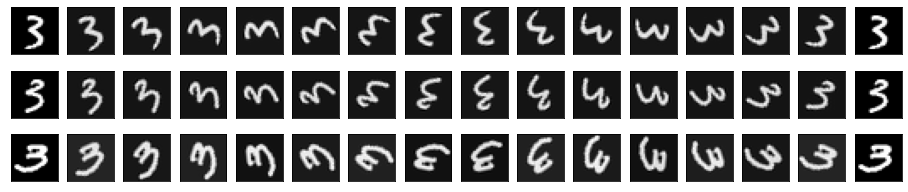

In [51]:
plt.figure(1,(20,8))
for j in range(3):
    for i in range(16):
        plt.subplot(7,20,j*20+i+1)
        plt.imshow(np.reshape(test_batch[j,i,:].cpu(),[28,28]), cmap='gray');
        plt.xticks([]); plt.yticks([])
plt.show()

In [9]:
from cgi import test


def compute_mse_std(model, data):
    with torch.no_grad():
        se_all = []
        for itr_test,test_batch in enumerate(data):
            test_batch = test_batch.to(device)
            [N,T,nc,d,d] = test_batch.shape
            L=1

            #encode
            s0_mu, s0_logv = model.vae.encoder(test_batch[:,0]) #N,q
            z0 = model.vae.encoder.sample(mu = s0_mu, logvar = s0_logv)
            v0_mu, v0_logv = None, None
            if model.order == 2:
                v0_mu, v0_logv = model.vae.encoder_v(torch.squeeze(test_batch[:,0:model.v_steps]))
                v0 = model.vae.encoder_v.sample(mu= v0_mu, logvar = v0_logv)
                z0 = torch.concat([z0,v0],dim=1) #N, 2q
            q = z0.shape[1]//2

            #sample flow
            ztL = model.sample_trajectories(z0,T,L) # L,N,T,2q

            #decode
            Xrec = model.build_decoding(ztL, (L,N,T,nc,d,d))

            se = (Xrec-test_batch)**2
            se_all.append(se)
        se_all = torch.stack(se_all)

        mse = torch.mean(se_all)
        std = torch.std(se_all)
        return mse, std


plot rollouts 1st ODE

In [47]:
def plot_latent_dynamics(model, data, fname):
    [N,T,nc,d,d] = data.shape
    s0_mu, s0_logv = model.vae.encoder(data[:,0]) #N,q
    z0 = model.vae.encoder.sample(mu = s0_mu, logvar = s0_logv)
    v0_mu, v0_logv = None, None
    if model.order == 2:
        v0_mu, v0_logv = model.vae.encoder_v(torch.squeeze(data[:,0:model.v_steps]))
        v0 = model.vae.encoder_v.sample(mu= v0_mu, logvar = v0_logv)
        z0 = torch.concat([z0,v0],dim=1) #N, 2q
    zt = model.sample_trajectories(z0,3*T).squeeze(0) # N,T,2q
    if model.order == 1:
        plot_latent_state(zt, show=True, fname=fname)
    # elif args.order ==2:
    #     st_mu = zt[:,:,:args.q] # N,T,q
    #     vt_mu = zt[:,:,args.q:] # N,T,q
    #     plot_latent_state(st_mu, show=False, fname=fname)
    #     plot_latent_velocity(vt_mu, show=False, fname=fname)

## RBF + random intial angle

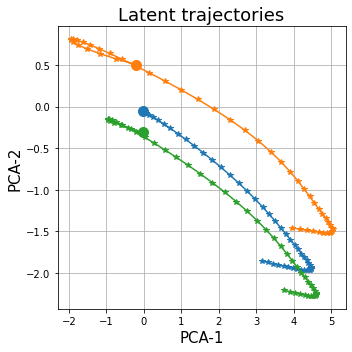

In [23]:
plot_latent_dynamics(odegpvae_ode1_rbf_6_rand, test_batch, 'latent_rollout.png')

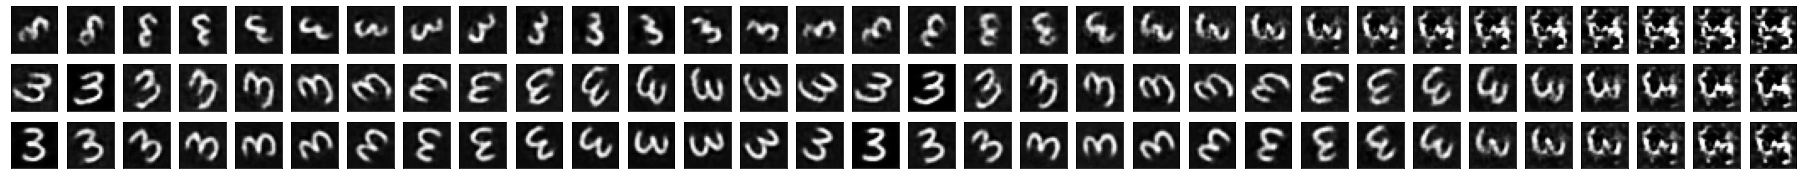

In [24]:

with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_rbf_6_rand(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

/home/ilze/PhD/OdeVaeGP/experiments/model/core/kernels.py:169: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2304.)
  nu = torch.triangular_solve(u_prior.T.unsqueeze(2), Lu, upper=False)[0]  # (D,M,1)


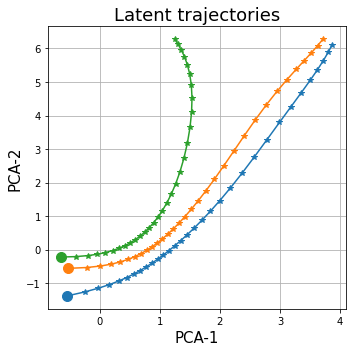

In [14]:
plot_latent_dynamics(odegpvae_ode1_rbf_6_rand, test_batch, 'latent_rollout.png')

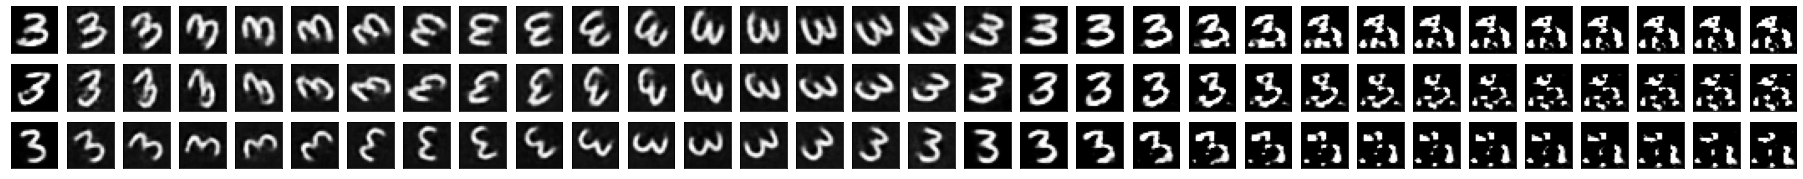

In [15]:

with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_rbf_6_rand(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

In [16]:
mse, std = compute_mse_std(odegpvae_ode1_rbf_6_rand, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.045454420149326324
std 0.12734529376029968


## RBF + fixed initial state

latent dim 6

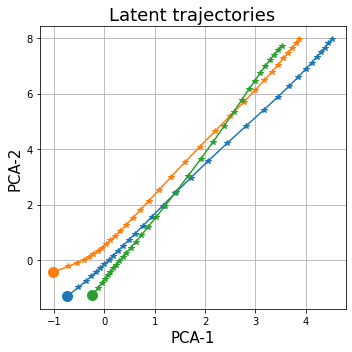

In [17]:
plot_latent_dynamics(odegpvae_ode1_rbf_6_fixed, test_batch, 'latent_rollout.png')

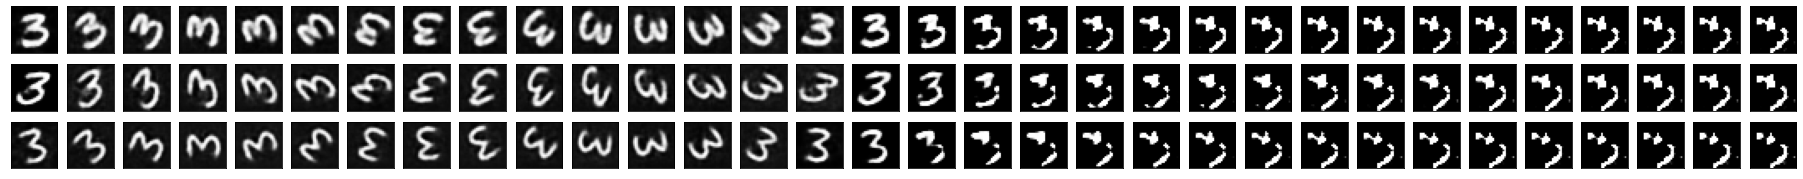

In [18]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_rbf_6_fixed(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

In [19]:
mse, std = compute_mse_std(odegpvae_ode1_rbf_6_fixed, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.02244172990322113
std 0.07746380567550659


latent dim 16

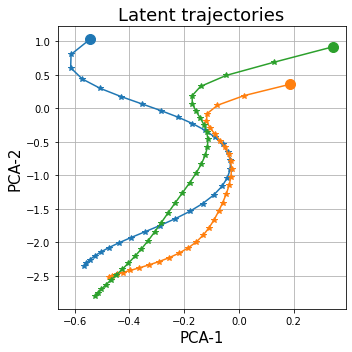

In [73]:
plot_latent_dynamics(odegpvae_ode1_rbf_16_fixed, test_batch, 'latent_rollout.png')

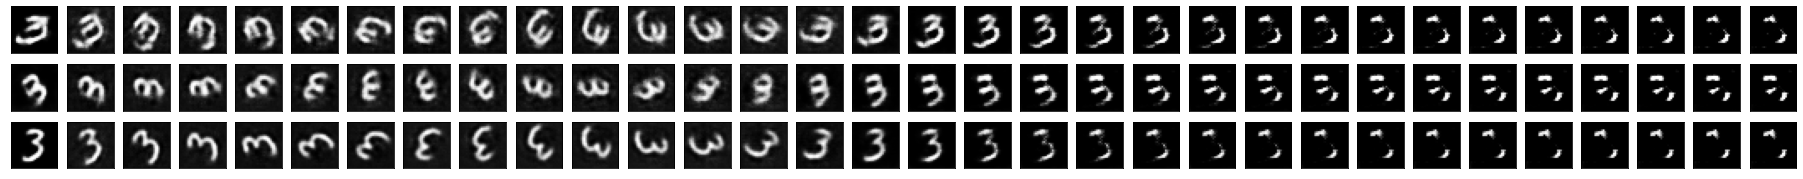

In [74]:

with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_rbf_16_fixed(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

In [75]:
mse, std = compute_mse_std(odegpvae_ode1_rbf_16_fixed, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.015865078195929527
std 0.05596672743558884


## DF kernel + random initial state

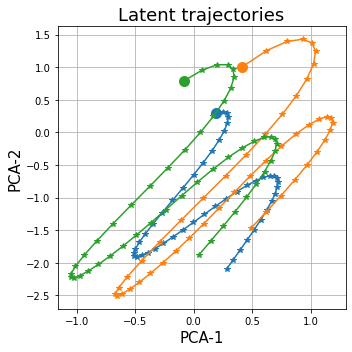

In [25]:
plot_latent_dynamics(odegpvae_ode1_df_6_rand, test_batch, 'latent_rollout.png')

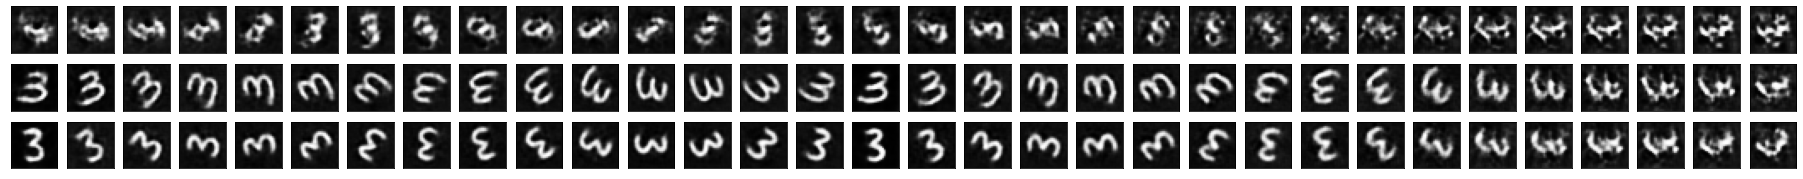

In [26]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_6_rand(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

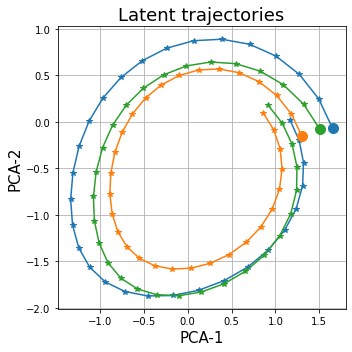

In [28]:
plot_latent_dynamics(odegpvae_ode1_df_6_rand, test_batch, 'latent_rollout.png')

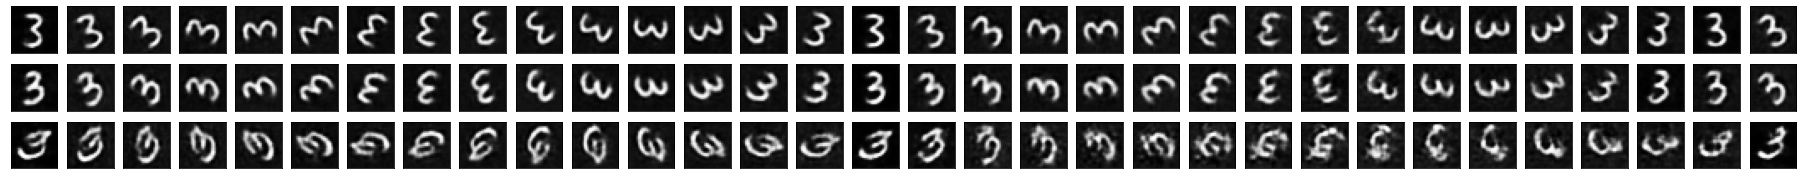

In [52]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_6_rand(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

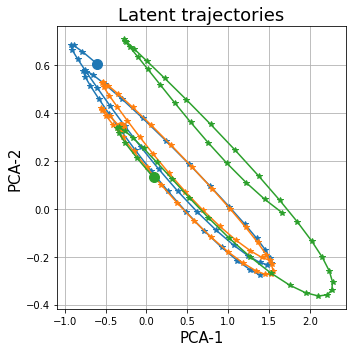

In [53]:
plot_latent_dynamics(odegpvae_ode1_df_6_rand, test_batch, fname='latent_rollout.png')

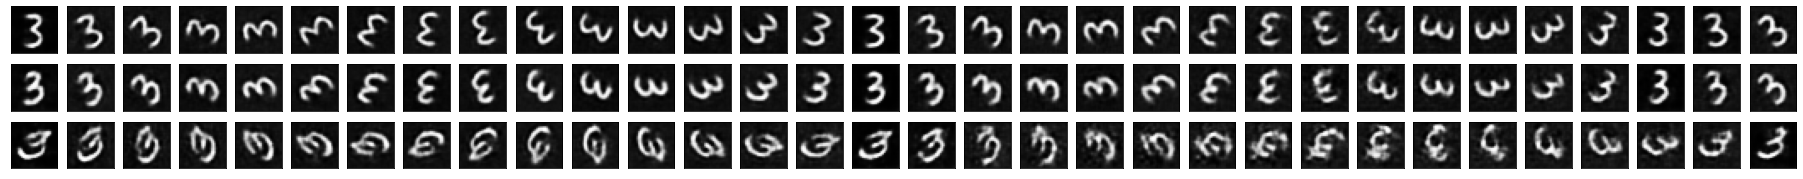

In [54]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_6_rand(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

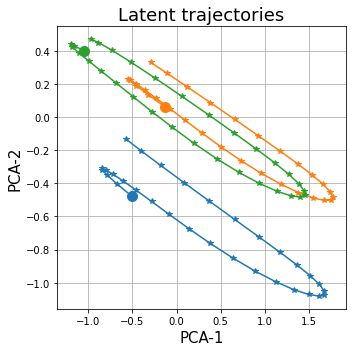

In [20]:
plot_latent_dynamics(odegpvae_ode1_df_6_rand, test_batch, 'latent_rollout.png')

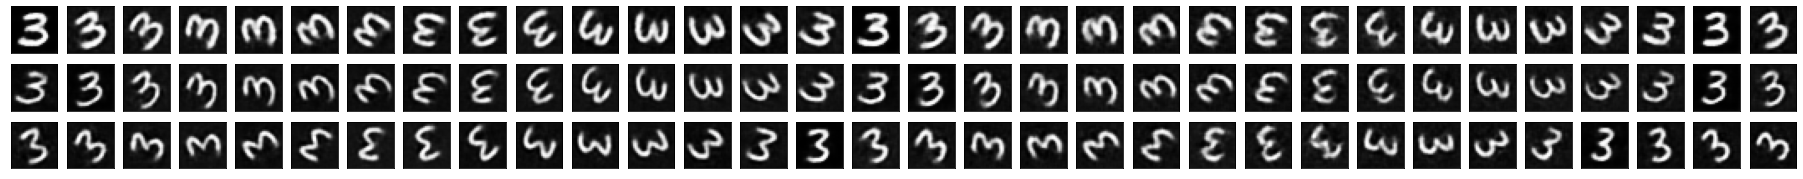

In [23]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_6_rand(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

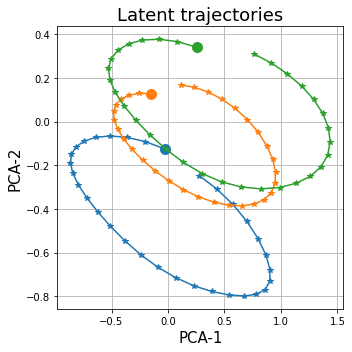

In [62]:
plot_latent_dynamics(odegpvae_ode1_df_6_rand, test_batch, 'latent_rollout.png')

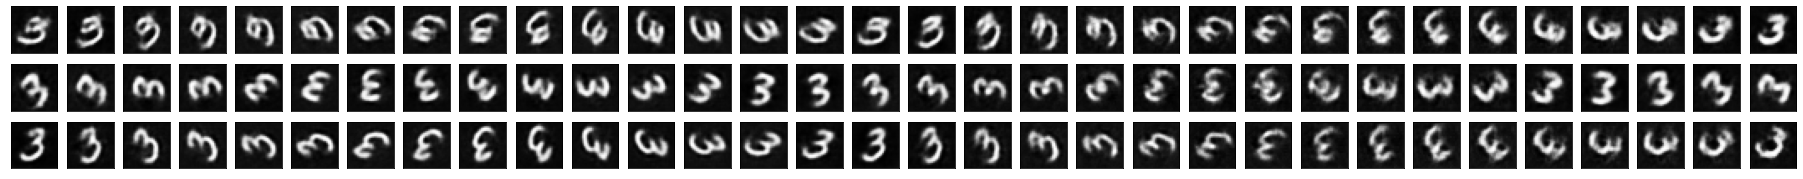

In [63]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_6_rand(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

In [64]:
mse, std = compute_mse_std(odegpvae_ode1_df_6_rand, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.03441197797656059
std 0.10014985501766205


## DF kernel + fixed initial state

latent dim 6

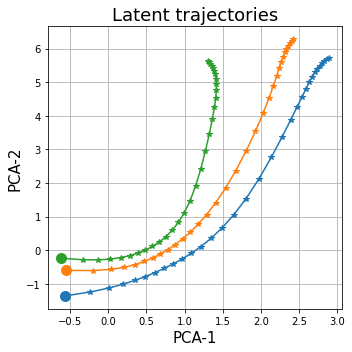

In [24]:
plot_latent_dynamics(odegpvae_ode1_df_6_fixed, test_batch, 'latent_rollout.png')

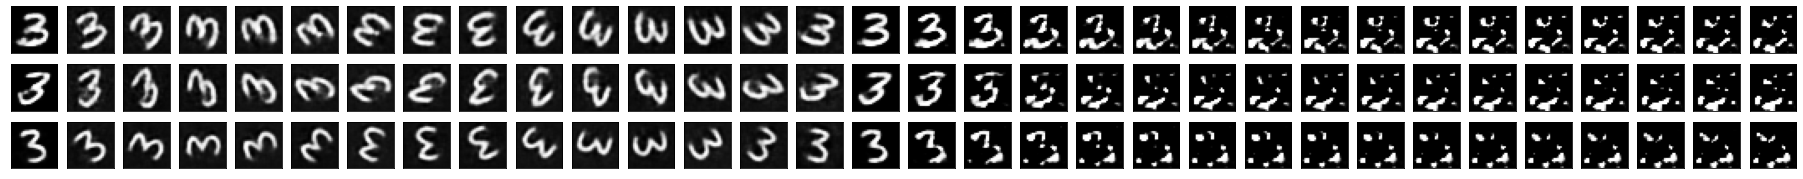

In [25]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_6_fixed(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

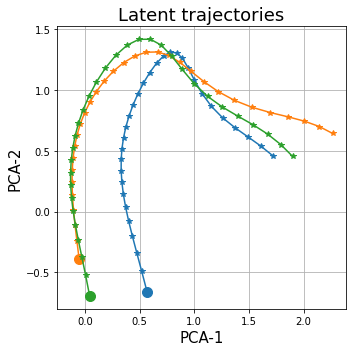

In [65]:
plot_latent_dynamics(odegpvae_ode1_df_6_fixed, test_batch, 'latent_rollout.png')

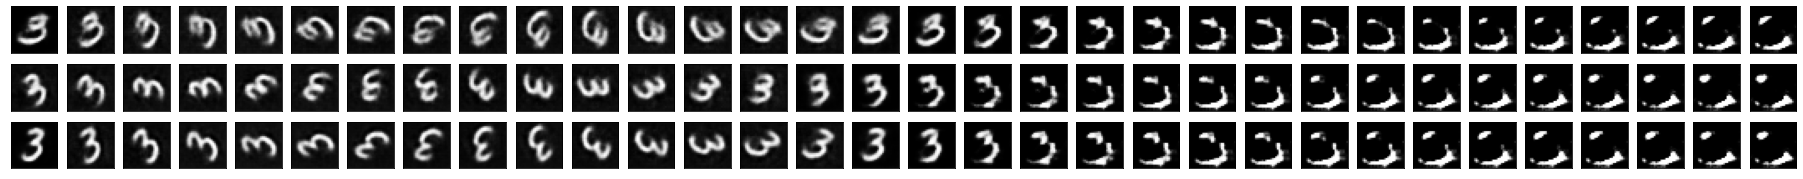

In [66]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_6_fixed(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

In [67]:
mse, std = compute_mse_std(odegpvae_ode1_df_6_fixed, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.019649550318717957
std 0.06443533301353455


latent dim 16

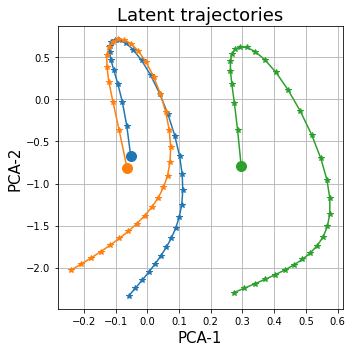

In [68]:
plot_latent_dynamics(odegpvae_ode1_df_16_fixed, test_batch, 'latent_rollout.png')

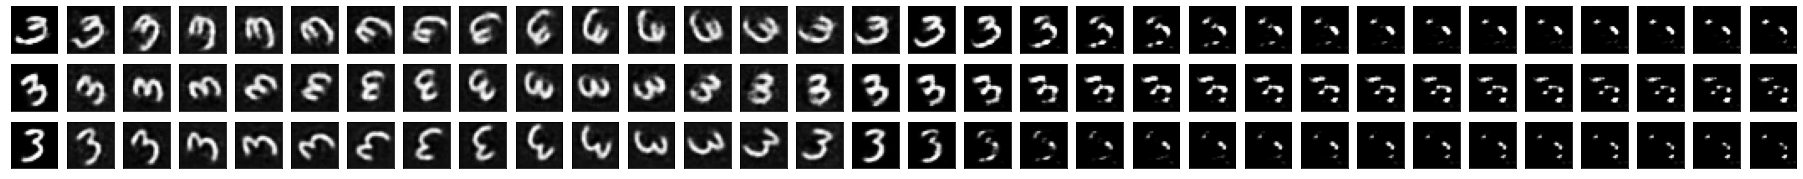

In [69]:
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_16_fixed(test_batch,  T_custom=2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

In [70]:
mse, std = compute_mse_std(odegpvae_ode1_df_16_fixed, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.013823873363435268
std 0.04974186792969704


plot rolltos 2nd ODE

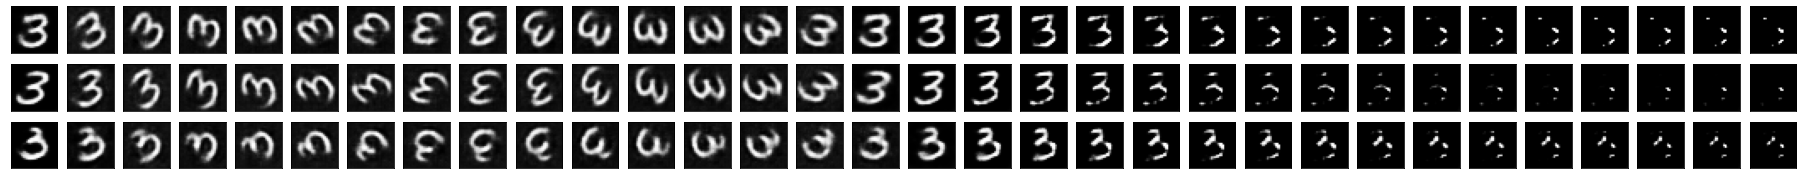

In [27]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae_ode2_kl_reg(test_batch, 2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

In [30]:
mse, std = compute_mse_std(odegpvae_ode2_kl_reg, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.018544940277934074
std 0.06240803748369217


/home/ilze/PhD/OdeVaeGP/experiments/model/core/dsvpy.py:126: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2304.)
  nu = torch.triangular_solve(u_prior.T.unsqueeze(2), Lu, upper=False)[0]  # (D,M,1)


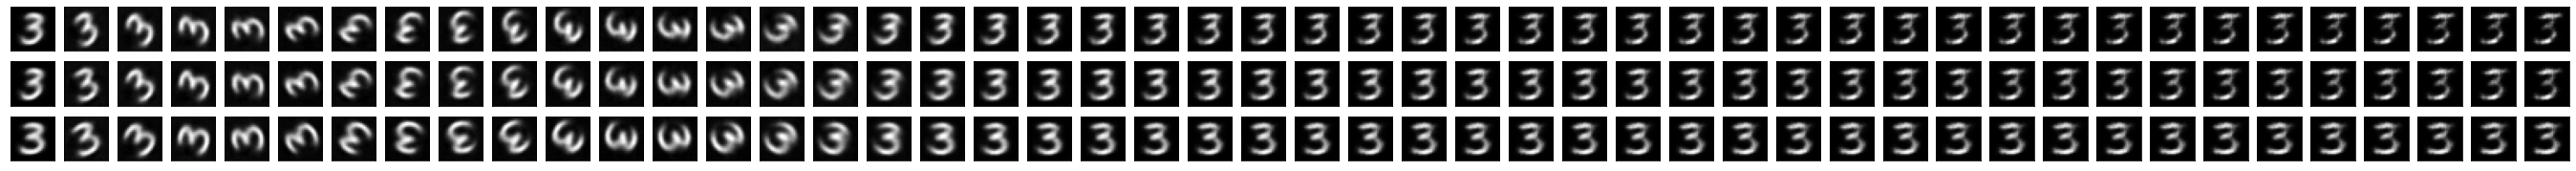

In [11]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae1_trace(test_batch, 3*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

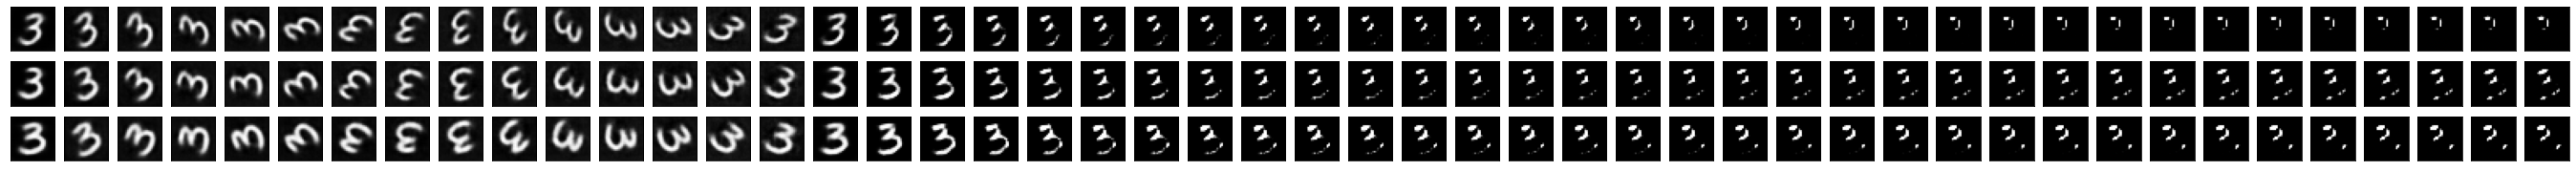

In [12]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae1_trace_z6(test_batch, 3*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

/Users/ilze/PhD/github/OdeVaeGP/experiments/model/core/dsvpy.py:126: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2310.)
  nu = torch.triangular_solve(u_prior.T.unsqueeze(2), Lu, upper=False)[0]  # (D,M,1)


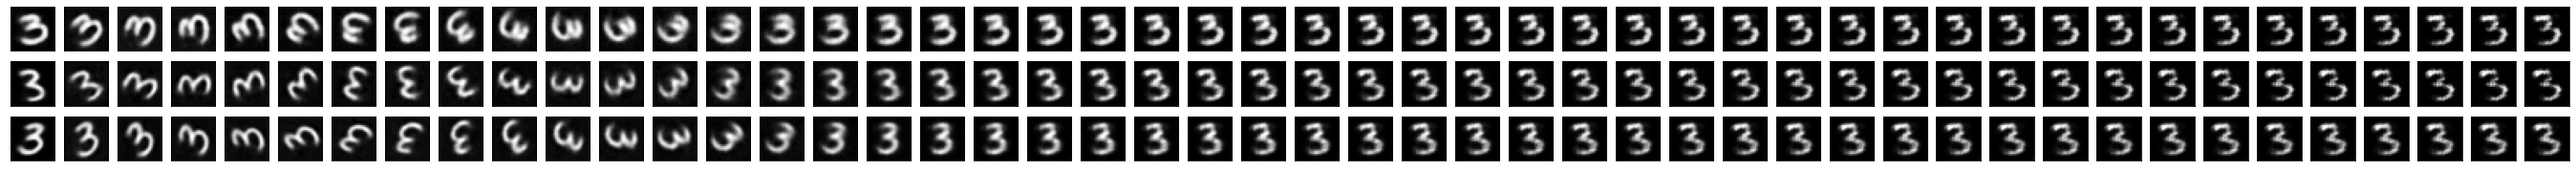

In [16]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae1_trace_beta(test_batch, 3*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

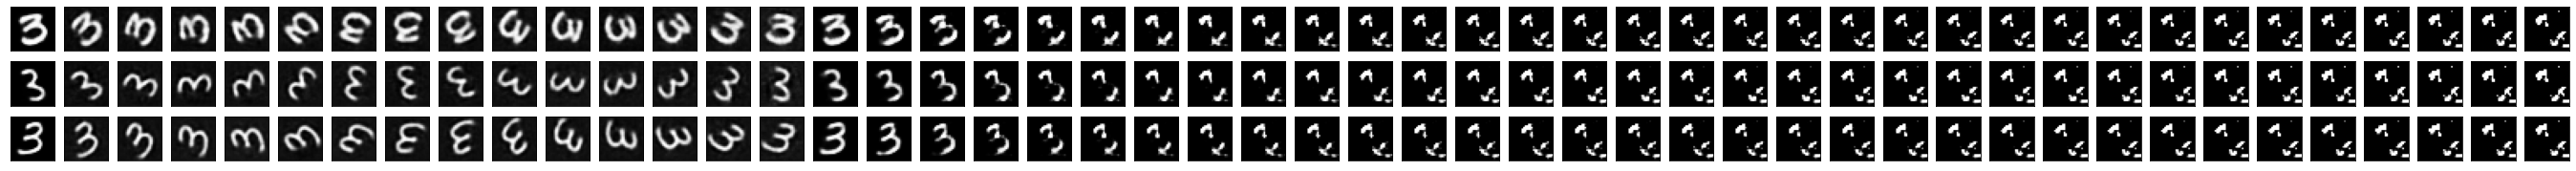

In [18]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae1_trace_noloss(test_batch, 3*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

/Users/ilze/PhD/github/OdeVaeGP/experiments/model/core/kernels.py:169: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2310.)
  nu = torch.triangular_solve(u_prior.T.unsqueeze(2), Lu, upper=False)[0]  # (D,M,1)


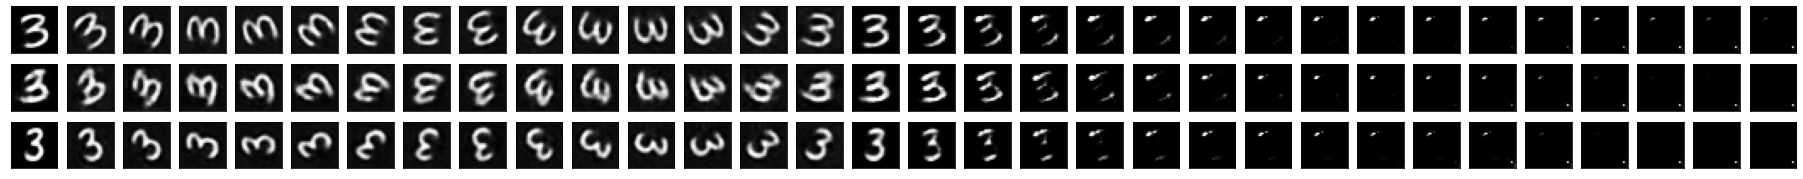

In [11]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae1_notrace(test_batch, 2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

/Users/ilze/PhD/github/OdeVaeGP/experiments/model/core/kernels.py:347: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2310.)
  nu = torch.triangular_solve(u_prior.reshape(Ku.shape[0])[:,None], Lu, upper=False)[0]  # MD,1


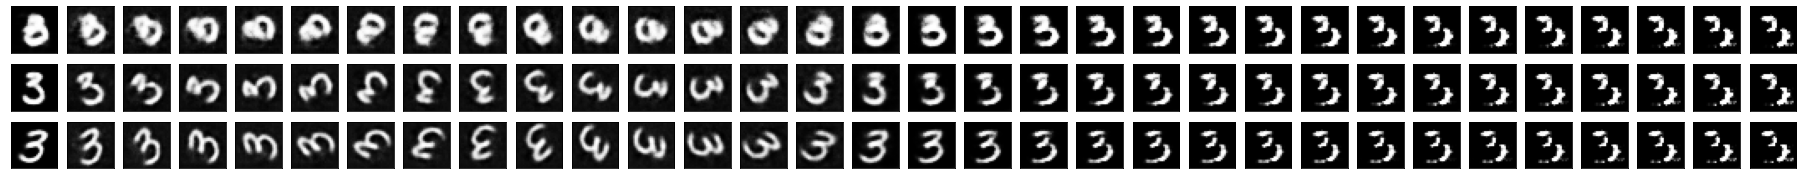

In [12]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae1_df(test_batch, 2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

check ode1 on testset std

In [42]:
mse, std = compute_mse_std(odegpvae1_notrace, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.009223180823028088
std 0.0342632494866848


In [14]:
mse, std = compute_mse_std(odegpvae1_df, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.01432304922491312
std 0.052145298570394516


plot rollouts 2nd ODE

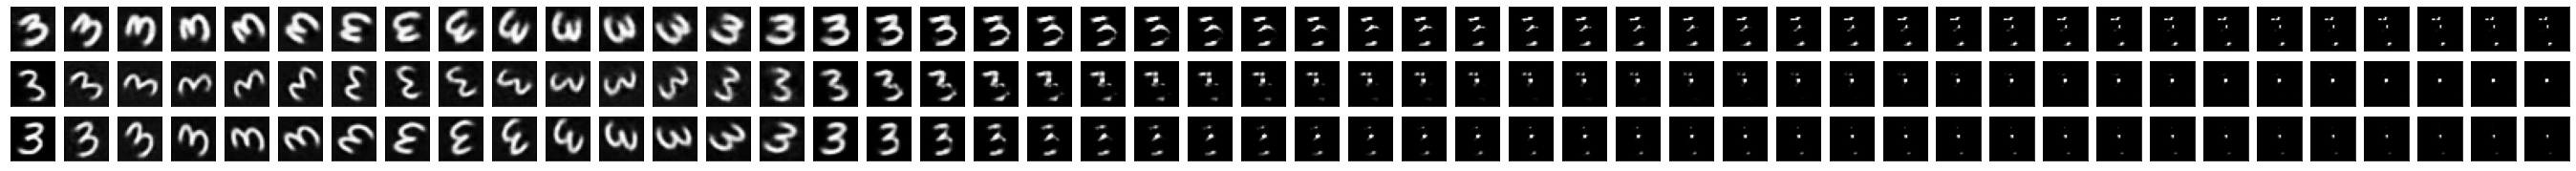

In [20]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae_trace(test_batch, 3*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

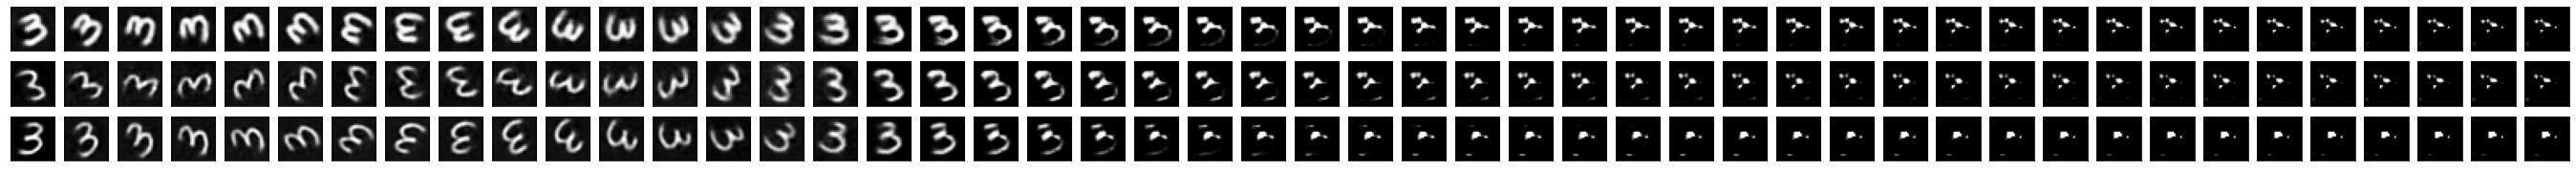

In [21]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae_trace_beta(test_batch, 3*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

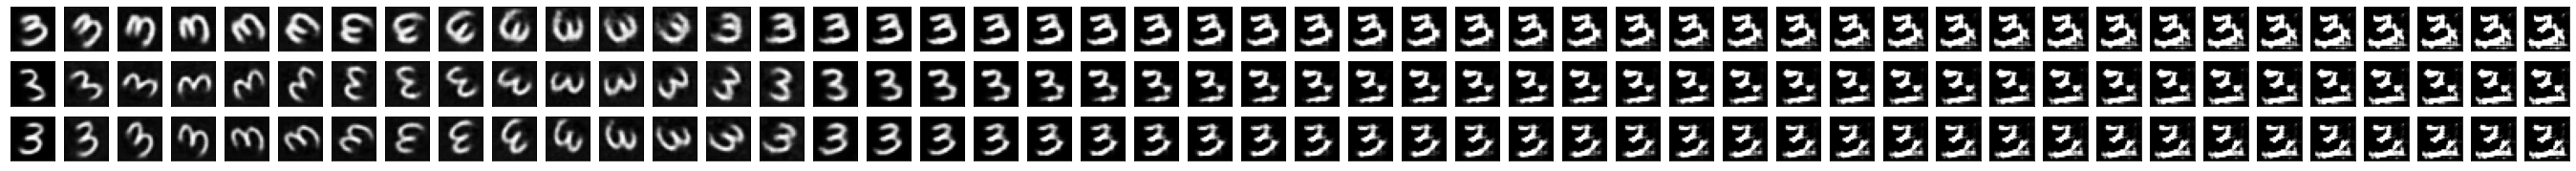

In [28]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae_trace_beta_DF(test_batch, 3*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

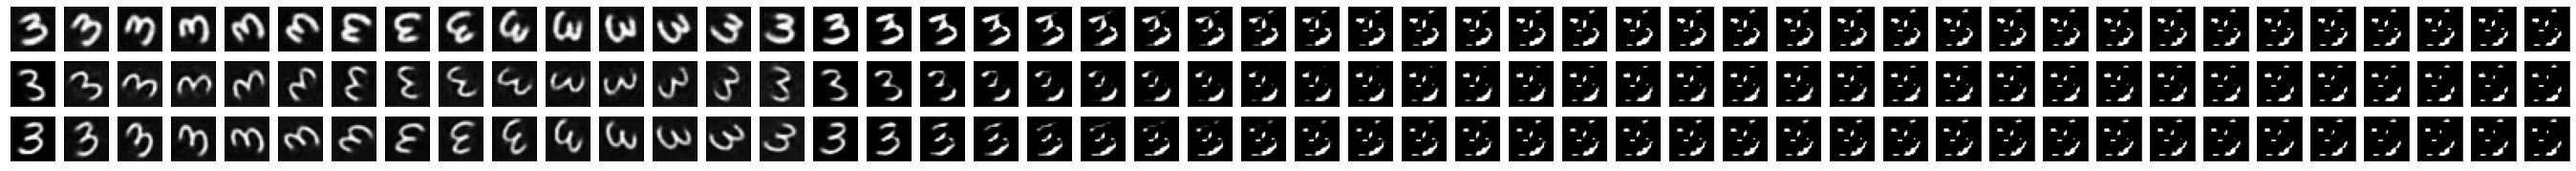

In [23]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae_notrace_loss(test_batch, 3*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

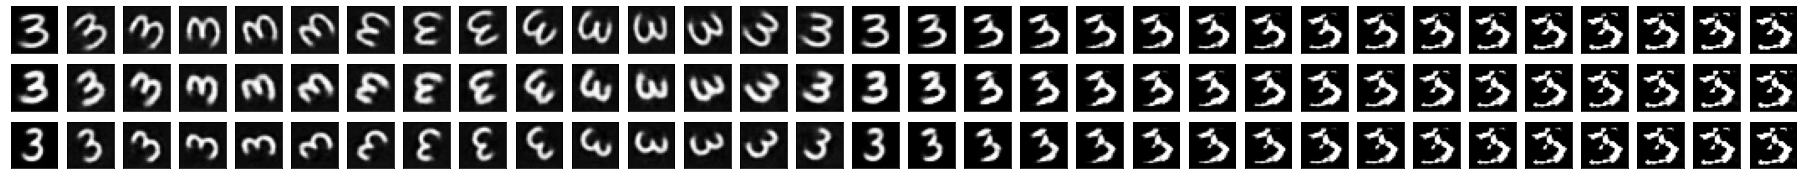

In [45]:
with torch.no_grad():    
    Xrec_mu, test_mse = odegpvae_notrace(test_batch, 2*T)
    plot_rollout(Xrec_mu.cpu(),show=True)

In [46]:
mse, std = compute_mse_std(odegpvae_notrace, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.010991075076162815
std 0.03997107595205307


# Plots for PCA investigation

In [8]:
from sklearn.decomposition import PCA

## Latent Dynamic Plotting

Pass the data through the encoder

In [5]:
#load a minibatch of data 
data_train = next(iter(trainset)) # N,T,nc,d,d
data_test = next(iter(testset)) # N,T,nc,d,d 

In [9]:
data_test[:3,:].shape

torch.Size([3, 16, 1, 28, 28])

check the data

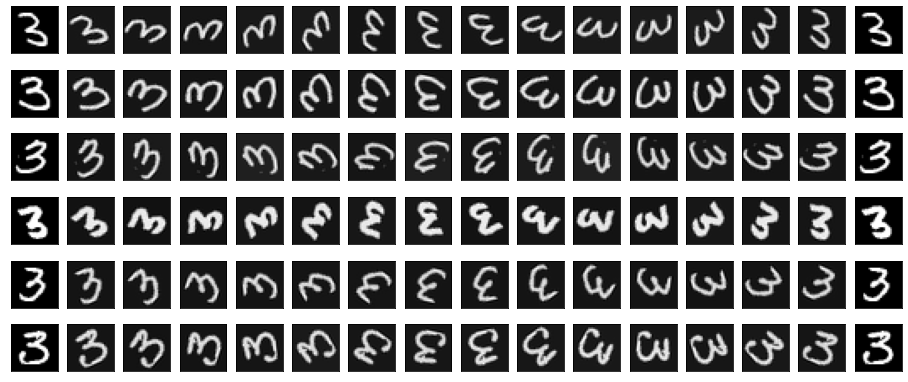

In [41]:
plt.figure(1,(20,8))
for j in range(6):
    for i in range(16):
        plt.subplot(7,20,j*20+i+1)
        plt.imshow(np.reshape(data_train[j,i,:],[28,28]), cmap='gray');
        plt.xticks([]); plt.yticks([])
plt.show()

In [22]:
[N,T,nc,d,d] = data_train.shape

## Option 1. Split the latent space into v and s 

In [13]:
def compute_latent(model,data, split=True):
    T=16
    #encode
    z0, logp0 = model.build_encoding(data)
    #compute the dynamics
    zt = model.build_flow(z0, logp0, T, trace=False) #N,T,2q
    if split:
        q=8
        st_mu = zt[:,:,q:] # N,T,q
        vt_mu = zt[:,:,:q] # N,T,q
        return st_mu, vt_mu
    else:
        return zt

In [14]:
zt = compute_latent(odegpvae_empty, data_train, split=False) #no training

In [ ]:
#first cache
odegpvae_empty.flow.odefunc.before_odeint(trace=False, rebuild_cache=True)
#then samle rhs
odegpvae_empty.flow.odefunc

In [16]:
F = plot_vector_field([t for t in range(16)],zt,odegpvae_empty.flow.odefunc) #X solution from the odeint , vdp the de, mu parameters

ValueError: too many values to unpack (expected 2)

In [ ]:
#first order ODE
def plot_vector_field(t, X, ode_rhs, L=1):
    N_ = 10

    F = ode_rhs(None,Z).detach().cpu().numpy()
    F /= ((F**2).sum(-1,keepdims=True))**(0.25) #0.25 #scale the data

    X = X.transpose(0,1)
    min_x,min_y = X.min(dim=0)[0].min(dim=0)[0].detach().cpu().numpy()
    max_x,max_y = X.max(dim=0)[0].max(dim=0)[0].detach().cpu().numpy()
    xs1_,xs2_ = np.meshgrid(np.linspace(min_x, max_x, N_),np.linspace(min_y, max_y, N_))
    Z = np.array([xs1_.T.flatten(), xs2_.T.flatten()]).T
    Z = torch.from_numpy(Z).float().to(X.device)
    Z = torch.stack([Z]*L)
    # F = ode_rhs(None,Z).detach().cpu().numpy()
    # F /= ((F**2).sum(-1,keepdims=True))**(0.25) #0.25 #scale the data

    Z  = Z.detach().cpu().numpy()
    t = t.detach().cpu().numpy()
    X = X.detach().cpu().numpy()

    fig = plt.figure(1,[15,7.5],constrained_layout=True)
    gs  = fig.add_gridspec(3, 3)
    ax1 = fig.add_subplot(gs[:, 0])

    ax1.set_xlabel('State $x_1$',fontsize=17)
    ax1.set_ylabel('State $x_2$',fontsize=17)
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)
    for F_ in F:
        h1 = ax1.quiver(xs1_, xs2_, F_[:,0].reshape(N_,N_).T, F_[:,1].reshape(N_,N_).T, \
                    cmap=plt.cm.Blues)
    plt.legend([h1],['Vector field'],
            loc='lower right', fontsize=10, bbox_to_anchor=(1.5, 0.05))
    plt.title('Vector field', fontsize=12)
    plt.show()
    return F

In [15]:
def plot_vector_field(t, X, ode_rhs, L=1):
    N_ = 10

    F = ode_rhs(None,Z).detach().cpu().numpy()
    F /= ((F**2).sum(-1,keepdims=True))**(0.25) #0.25 #scale the data

    X = X.transpose(0,1)
    min_x,min_y = X.min(dim=0)[0].min(dim=0)[0].detach().cpu().numpy()
    max_x,max_y = X.max(dim=0)[0].max(dim=0)[0].detach().cpu().numpy()
    xs1_,xs2_ = np.meshgrid(np.linspace(min_x, max_x, N_),np.linspace(min_y, max_y, N_))
    Z = np.array([xs1_.T.flatten(), xs2_.T.flatten()]).T
    Z = torch.from_numpy(Z).float().to(X.device)
    Z = torch.stack([Z]*L)
    # F = ode_rhs(None,Z).detach().cpu().numpy()
    # F /= ((F**2).sum(-1,keepdims=True))**(0.25) #0.25 #scale the data

    Z  = Z.detach().cpu().numpy()
    t = t.detach().cpu().numpy()
    X = X.detach().cpu().numpy()

    fig = plt.figure(1,[15,7.5],constrained_layout=True)
    gs  = fig.add_gridspec(3, 3)
    ax1 = fig.add_subplot(gs[:, 0])

    ax1.set_xlabel('State $x_1$',fontsize=17)
    ax1.set_ylabel('State $x_2$',fontsize=17)
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)
    for F_ in F:
        h1 = ax1.quiver(xs1_, xs2_, F_[:,0].reshape(N_,N_).T, F_[:,1].reshape(N_,N_).T, \
                    cmap=plt.cm.Blues)
    plt.legend([h1],['Vector field'],
            loc='lower right', fontsize=10, bbox_to_anchor=(1.5, 0.05))
    plt.title('Vector field', fontsize=12)
    plt.show()
    return F

extract latents for models from different training points

In [12]:
st_mu_base, vt_mu_base = compute_latent(odegpvae_empty, data_train) #no training
st_mu_100, vt_mu_100 = compute_latent(odegpvae_100, data_train) #100 epochs
st_mu_200, vt_mu_200 = compute_latent(odegpvae_200, data_train) #200 epochs
st_mu_500, vt_mu_500 = compute_latent(odegpvae_500, data_train) #500 epochs

/Users/ilze/PhD/github/OdeVaeGP/experiments/model/core/dsvpy.py:114: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH().
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:1816.)
  Lu = torch.cholesky(Ku + torch.eye(self.M).to(self.device) * jitter)  # (M,M) or (D,M,M)
/Users/ilze/PhD/github/OdeVaeGP/experiments/model/core/dsvpy.py:122: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.

### Option 1A: Fit a different pca for every time dimension

In [45]:
pca = PCA(n_components=2)

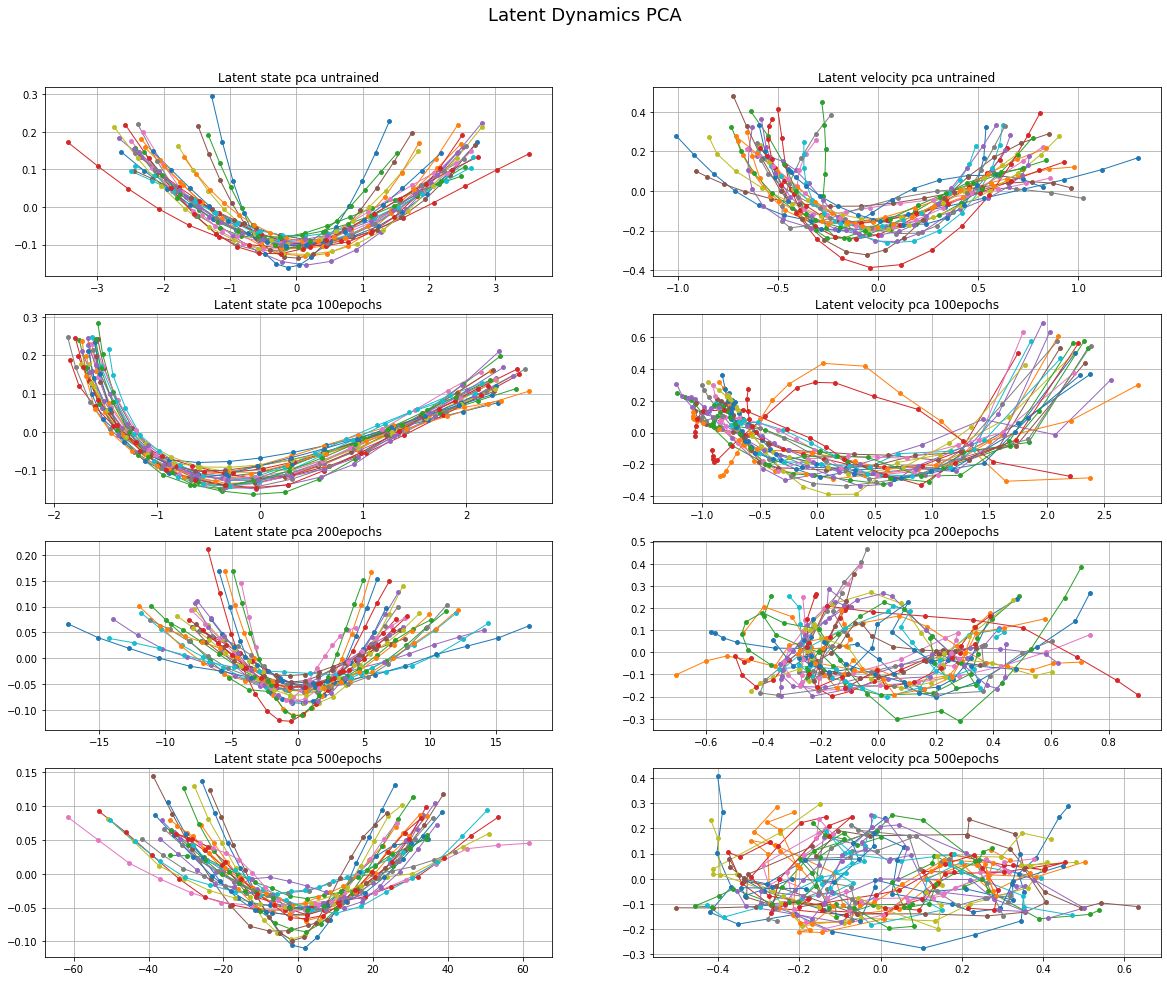

In [47]:
# create subplots
names = ['untrained', '100epochs', '200epochs','500epochs']
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(20, 16))
fig.suptitle("Latent Dynamics PCA", fontsize=18, y=0.95)
with torch.set_grad_enabled(False):
    for n in range(N):
        for i, data in zip(range(4), ((st_mu_base, vt_mu_base), (st_mu_100, vt_mu_100), (st_mu_200, vt_mu_200),(st_mu_500, vt_mu_500))):
            data_s, data_v = data
            s_pca = pca.fit_transform(data_s[n]) # T,2
            v_pca = pca.fit_transform(data_v[n]) # T,2
            axs[i][0].plot(s_pca[:,0],s_pca[:,1],lw=1)
            axs[i][0].scatter(s_pca[:,0],s_pca[:,1], s = 15, zorder=2.5)
            axs[i][1].plot(v_pca[:,0],v_pca[:,1],lw=1)
            axs[i][1].scatter(v_pca[:,0],v_pca[:,1], s = 15, zorder=2.5)
            axs[i][0].set_title('Latent state pca ' + names[i])
            axs[i][1].set_title('Latent velocity pca ' + names[i])
            axs[i][0].grid()
            axs[i][1].grid()
            
plt.show()

### Option 1B: Fit a pca for t=0 reuse for every time dimension

iteratively create pca models

In [19]:
dict_pca = {}
with torch.set_grad_enabled(False): 
    for n, data in zip(range(4), ((st_mu_base, vt_mu_base), (st_mu_100, vt_mu_100), (st_mu_200, vt_mu_200), (st_mu_500, vt_mu_500))):
        s, v = data
        dict_pca['pca_{}_s'.format(n)] = PCA(n_components=2).fit(s.reshape(N*T,8))
        dict_pca['pca_{}_v'.format(n)] = PCA(n_components=2).fit(v.reshape(N*T,8))

velocity (v1,t) & (v2,t)

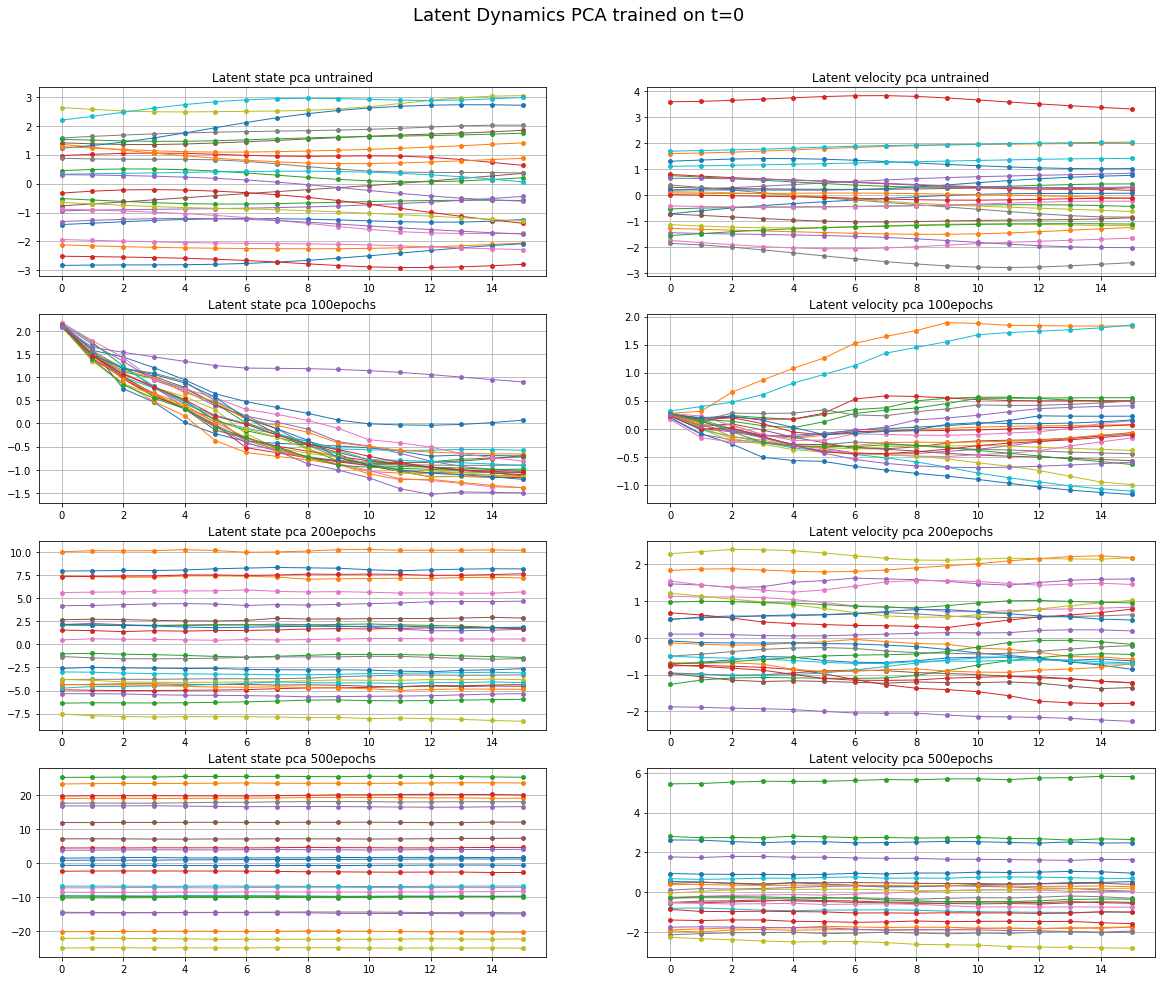

In [25]:
#create subplots
t = [t for t in range(T)]
names = ['untrained', '100epochs', '200epochs','500epochs']
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(20, 16))
fig.suptitle("Latent Dynamics PCA trained on t=0", fontsize=18, y=0.95)
with torch.set_grad_enabled(False):
    for n in range(N):
        for i, data in zip(range(4), ((st_mu_base, vt_mu_base), (st_mu_100, vt_mu_100), (st_mu_200, vt_mu_200), (st_mu_500, vt_mu_500))):
            data_s, data_v = data
            s_pca = dict_pca['pca_{}_s'.format(i)].transform(data_s[n]) # T,2
            v_pca = dict_pca['pca_{}_v'.format(i)].transform(data_v[n]) # T,2
            axs[i][0].plot(t,v_pca[:,0],lw=1)
            axs[i][0].scatter(t,v_pca[:,0], s = 15, zorder=2.5)
            axs[i][1].plot(t,v_pca[:,1],lw=1)
            axs[i][1].scatter(t,v_pca[:,1], s = 15, zorder=2.5)
            axs[i][0].set_title('Latent state pca '+ names[i])
            axs[i][1].set_title('Latent velocity pca '+ names[i])
            axs[i][0].grid()
            axs[i][1].grid()
            
plt.show()

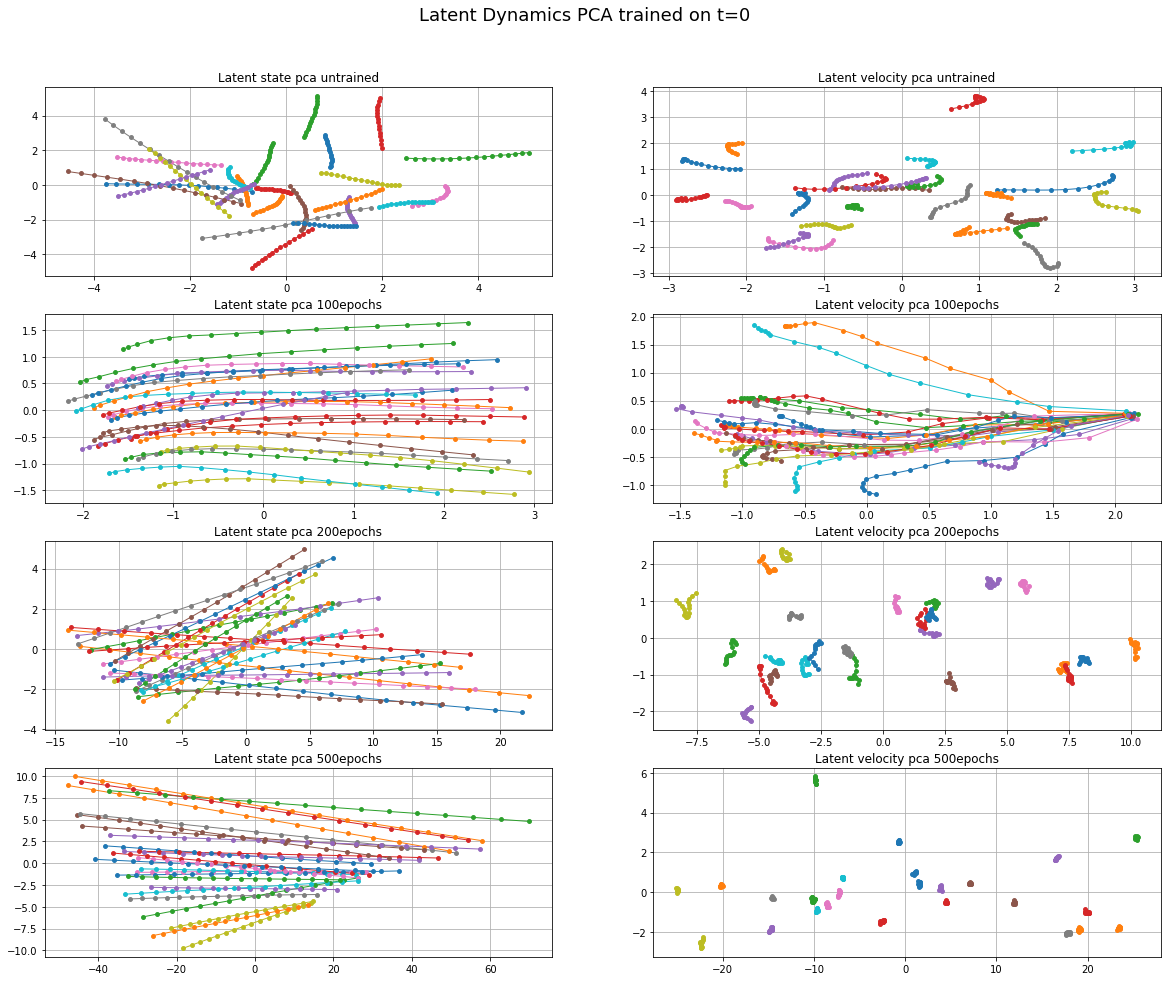

In [26]:
# create subplots
names = ['untrained', '100epochs', '200epochs','500epochs']
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(20, 16))
fig.suptitle("Latent Dynamics PCA trained on t=0", fontsize=18, y=0.95)
with torch.set_grad_enabled(False):
    for n in range(N):
        for i, data in zip(range(4), ((st_mu_base, vt_mu_base), (st_mu_100, vt_mu_100), (st_mu_200, vt_mu_200), (st_mu_500, vt_mu_500))):
            data_s, data_v = data
            s_pca = dict_pca['pca_{}_s'.format(i)].transform(data_s[n]) # T,2
            v_pca = dict_pca['pca_{}_v'.format(i)].transform(data_v[n]) # T,2
            axs[i][0].plot(s_pca[:,0],s_pca[:,1],lw=1)
            axs[i][0].scatter(s_pca[:,0],s_pca[:,1], s = 15, zorder=2.5)
            axs[i][1].plot(v_pca[:,0],v_pca[:,1],lw=1)
            axs[i][1].scatter(v_pca[:,0],v_pca[:,1], s = 15, zorder=2.5)
            axs[i][0].set_title('Latent state pca '+ names[i])
            axs[i][1].set_title('Latent velocity pca '+ names[i])
            axs[i][0].grid()
            axs[i][1].grid()
            
plt.show()

one dim encoding, plotting (s,v)

In [29]:
dict_pca = {}
with torch.set_grad_enabled(False): 
    for n, data in zip(range(4), ((st_mu_base, vt_mu_base), (st_mu_100, vt_mu_100), (st_mu_200, vt_mu_200), (st_mu_500, vt_mu_500))):
        s, v = data
        dict_pca['pca_{}_s'.format(n)] = PCA(n_components=1).fit(s.reshape(N*T,8))
        dict_pca['pca_{}_v'.format(n)] = PCA(n_components=1).fit(v.reshape(N*T,8))

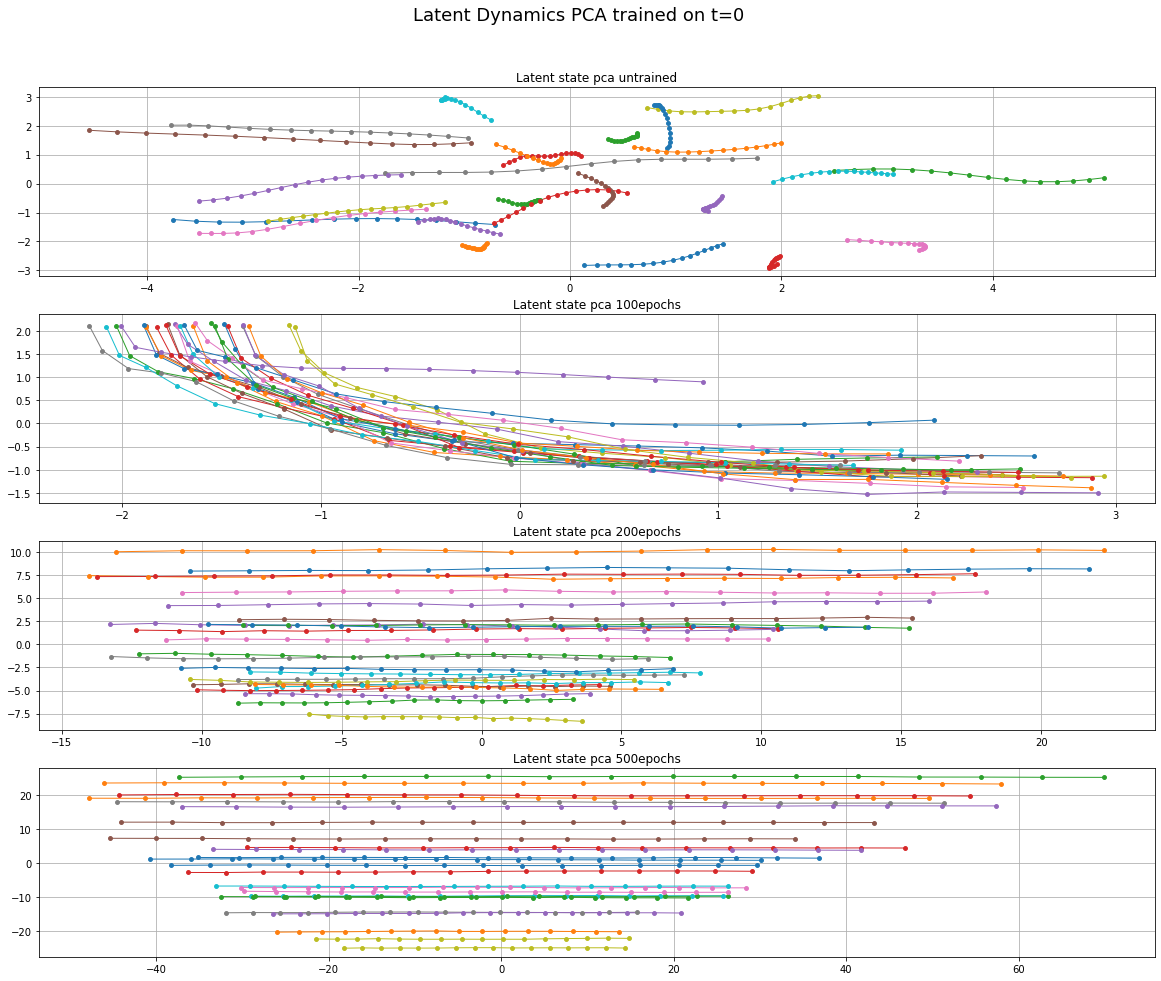

In [30]:
# create subplots
names = ['untrained', '100epochs', '200epochs','500epochs']
fig, axs = plt.subplots(nrows=4, ncols=1,figsize=(20, 16))
fig.suptitle("Latent Dynamics PCA trained on t=0", fontsize=18, y=0.95)
with torch.set_grad_enabled(False):
    for n in range(N):
        for i, data in zip(range(4), ((st_mu_base, vt_mu_base), (st_mu_100, vt_mu_100), (st_mu_200, vt_mu_200), (st_mu_500, vt_mu_500))):
            data_s, data_v = data
            s_pca = dict_pca['pca_{}_s'.format(i)].transform(data_s[n]) # T,1
            v_pca = dict_pca['pca_{}_v'.format(i)].transform(data_v[n]) # T,1
            axs[i].plot(s_pca,v_pca,lw=1)
            axs[i].scatter(s_pca,v_pca, s = 15, zorder=2.5)
            axs[i].set_title('Latent state pca '+ names[i])
            axs[i].grid()

            
plt.show()

## Option 2. Keep the latent space as single vector zt 

### Option 2A: Fit a different pca for every time dimension

In [50]:
zt_base = compute_latent(odegpvae_empty, data_train, split=False) #no training
zt_100 = compute_latent(odegpvae_100, data_train, split=False) #100 epochs
zt_200 = compute_latent(odegpvae_200, data_train, split=False) #200 epochs
zt_500  = compute_latent(odegpvae_500, data_train, split=False) #500 epochs

In [51]:
pca = PCA(n_components=2)

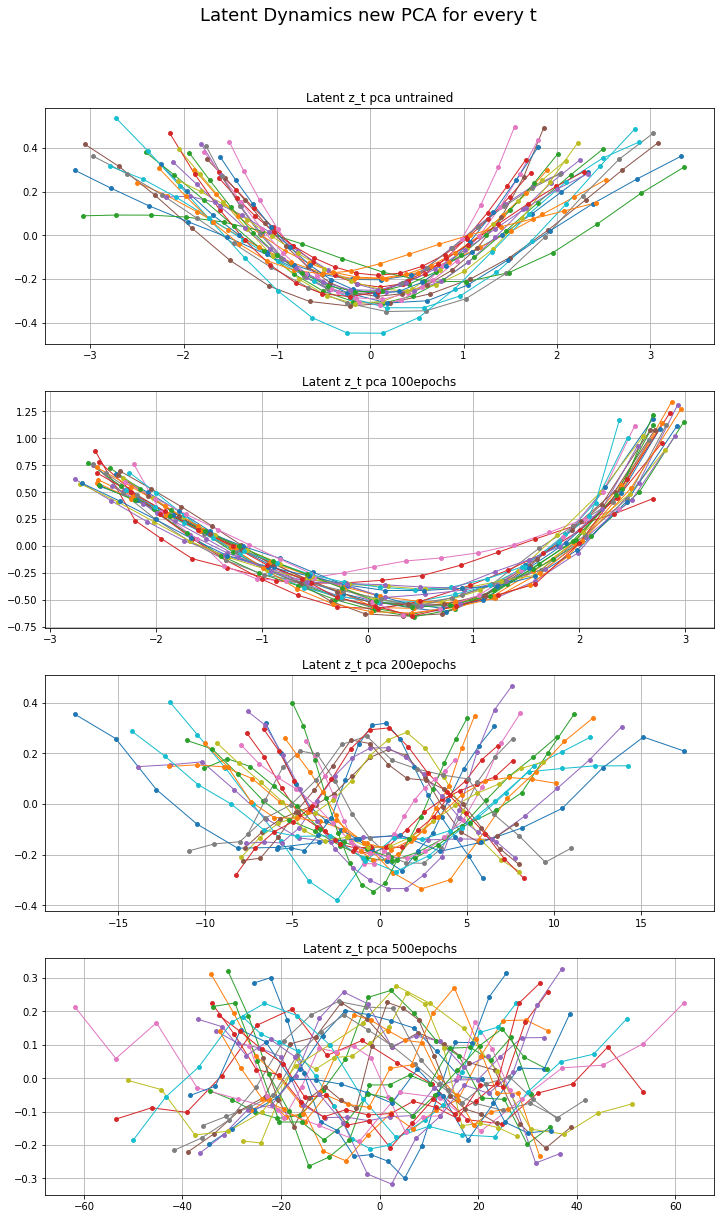

In [52]:
# create subplots
names = ['untrained', '100epochs', '200epochs', '500epochs']
fig, axs = plt.subplots(nrows=4, ncols=1,figsize=(12, 20))
fig.suptitle("Latent Dynamics new PCA for every t", fontsize=18, y=0.95)
with torch.set_grad_enabled(False):
    for n in range(N):
        for i, data_z in zip(range(4), (zt_base, zt_100, zt_200, zt_500)):
            z_pca = pca.fit_transform(data_z[n]) # T,2
            axs[i].plot(z_pca[:,0],z_pca[:,1],lw=1)
            axs[i].scatter(z_pca[:,0],z_pca[:,1], s = 15, zorder=2.5)
            axs[i].set_title('Latent z_t pca ' + names[i])
            axs[i].grid()


plt.show()

### Option 2B: Fit inttial pca for t=0, reuse for every time dimension

In [53]:
dict_pca_zt = {}
with torch.set_grad_enabled(False): 
    for n, data_zt in zip(range(4), (zt_base, zt_100, zt_200,zt_500)):
        dict_pca_zt['pca_{}_zt'.format(n)] = PCA(n_components=2).fit(data_zt[:,0])

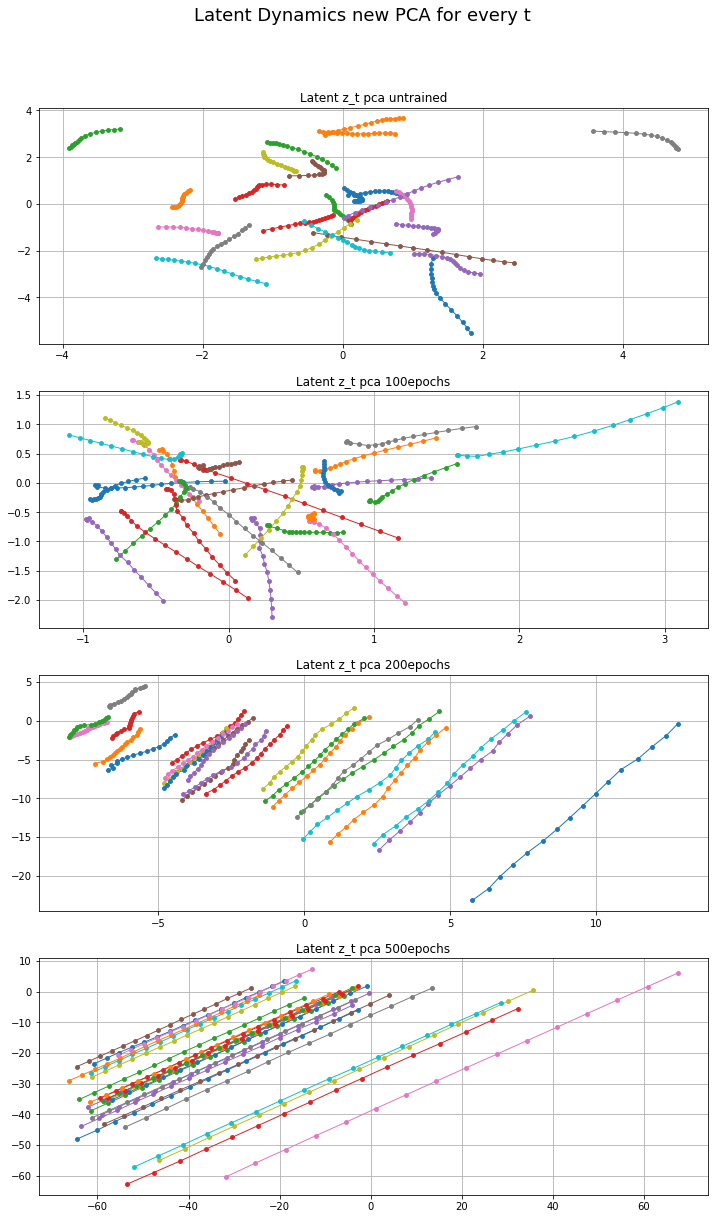

In [54]:
# create subplots
names = ['untrained', '100epochs', '200epochs', '500epochs']
fig, axs = plt.subplots(nrows=4, ncols=1,figsize=(12, 20))
fig.suptitle("Latent Dynamics new PCA for every t", fontsize=18, y=0.95)
with torch.set_grad_enabled(False):
    for n in range(N):
        for i, data_z in zip(range(4), (zt_base, zt_100, zt_200, zt_500)):
            z_pca = dict_pca_zt['pca_{}_zt'.format(i)].transform(data_z[n]) # T,2
            axs[i].plot(z_pca[:,0],z_pca[:,1],lw=1)
            axs[i].scatter(z_pca[:,0],z_pca[:,1], s = 15, zorder=2.5)
            axs[i].set_title('Latent z_t pca ' + names[i])
            axs[i].grid()
plt.show()